# Hello, PyTorch:: homework tasks

There are 3 tasks with different relative __point__ worth.
If you get stuck with no progress, try switching to the next task and returning later.

In [2]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/deep_vision_and_graphics/fall22/week01-pytorch_intro/notmnist.py
    !touch .setup_complete

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt 
print(torch.__version__)

2.0.1+cu118


### Task I (20% points) - tensormancy

![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


__1.1 The Cannabola__ 
[(_disclaimer_)](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

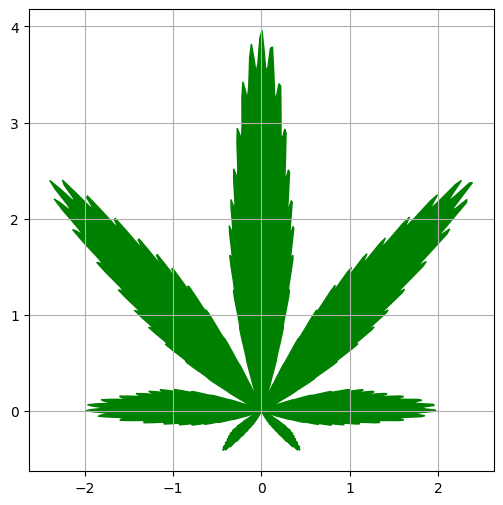

In [4]:
theta = torch.linspace(- np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = (1 + .9 * torch.cos(8 * theta)) * (1 + .1 * torch.cos(24 * theta)) * (.9 + .05 * torch.cos(200 * theta)) * (1 + torch.sin(theta))

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho * torch.cos(theta)
y = rho * torch.sin(theta)


plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

### Task II: The Game of Life (30% points)

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure PyTorch_. 

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU!__ Indeed, what could be a better use of your GPU than simulating Game of Life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the URL above out of sloth, here's the Game of Life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference NumPy implementation that you must convert to PyTorch.
_[NumPy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format.

__Note 2:__ From the mathematical standpoint, PyTorch convolution is actually cross-correlation. Those two are very similar operations. More info: [video tutorial](https://www.youtube.com/watch?v=C3EEy8adxvc), [scipy functions review](http://programmerz.ru/questions/26903/2d-convolution-in-python-similar-to-matlabs-conv2-question), [stack overflow source](https://stackoverflow.com/questions/31139977/comparing-matlabs-conv2-with-scipys-convolve2d).

In [5]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [6]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.

    You can opt to create a new tensor or change Z inplace.
    """

    filters = torch.tensor([[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]], dtype=Z.dtype)

    N = torch.nn.functional.conv2d(Z[None, ...], filters[None, None, ...], padding=1)[0]

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    

    return Z

In [7]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), \
    "your PyTorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


In [8]:
%matplotlib notebook

plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>

In [9]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE)

### Task III: Going deeper (50% points)
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>
Your ultimate task for this week is to build your first neural network [almost] from scratch and pure PyTorch.

This time you will solve the same digit recognition problem, but at a larger scale

* 10 different letters
* 20k samples

We want you to build a network that reaches at least 80% accuracy and has at least 2 linear layers in it. Naturally, it should be nonlinear to beat logistic regression.

With 10 classes you will need to use __Softmax__ at the top instead of sigmoid and train using __categorical crossentropy__  (see [here](http://wiki.fast.ai/index.php/Log_Loss)). You can write loss any way you want, but we recommend merging log-loss with the last layer softmax, since it can be simplified.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) neural network should already give you an edge over logistic regression.

__Win conditions:__
* __Your model must be nonlinear,__ but not necessarily deep.
* __Train your model once with SGD, and again with Momentum, RMSProp or Adam__ - which you will have to implement
* __For this task only, please do not use the contents of `torch.nn` and `torch.optim`.__ That's for the next task.




__[bonus kudos]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILERS!__
At the end of the notebook you will find a few tips and frequent errors. 
If you feel confident enough, just start coding right away and get there ~~if~~ once you need to untangle yourself.

In [42]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])
X_train, y_train, X_test, y_test = map(torch.tensor, [X_train, y_train, X_test, y_test])

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


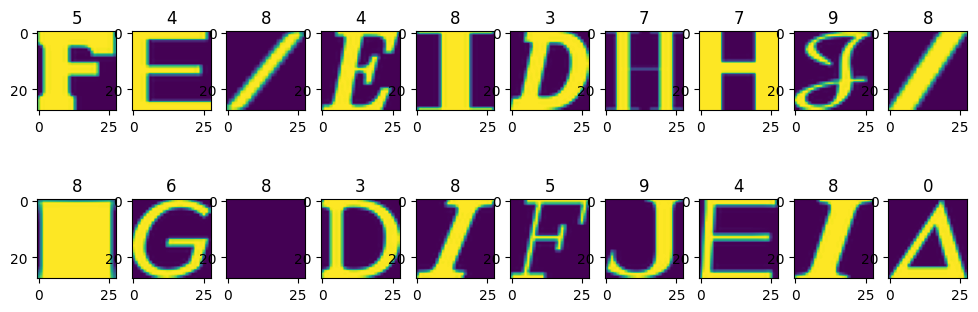

In [11]:
%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

In [13]:
import torch

In [202]:
t = torch.arange(10)

In [204]:
t.device = "cuda"

AttributeError: attribute 'device' of 'torch._C._TensorBase' objects is not writable

In [228]:
from functools import reduce


class Module():
    def __init__(self):
        self._parameters = []
        self._train = True

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

    def train(self):
        self._train = True

    def eval(self):
        self._train = False


class Linear(Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        k = 1 / in_features ** .5
        self.W = torch.rand(in_features, out_features) * k - k / 2
        self.b = torch.rand(out_features) * k - k / 2
        self.W.requires_grad = True
        self.b.requires_grad = True
        self.bias = bias
        self._parameters = [self.W] + ([self.b] if bias else [])

    def forward(self, X):
        if self.bias:
            return X @ self.W + self.b
        return X @ self.W


class ReLU(Module):
    def forward(self, X):
        return X.where(X < 0, 0)


class BatchNorm1D(Module):
    def __init__(self, momentum=.1):
        super().__init__()
        self.mean, self.std, self.momentum = map(torch.scalar_tensor, [0, 1, momentum])
        self.beta = torch.scalar_tensor(0, requires_grad=True)
        self.sigma = torch.scalar_tensor(1, requires_grad=True)
        self._parameters = [self.beta, self.sigma]

    def forward(self, X):
        if self._train:
            mean, std = X.mean(axis=0), X.std(axis=0)
            self.mean = (1 - self.momentum) * self.mean + \
                self.momentum * X.mean(axis=0)
            self.std = (1 - self.momentum) * self.std + \
                self.momentum * X.std(axis=0)
        else:
            mean, std = self.mean, self.std
        X = (X - mean) / std
        X = X * self.sigma + self.beta
        return X


class Sequential(Module):
    def __init__(self, *modules):
        super().__init__()
        self.modules = modules
        self._parameters = [param for module in modules for param in module._parameters]
        
    def forward(self, X):
        return reduce(lambda x, f: f(x), self.modules, X)

In [297]:
def CrossEntropyLoss(y_pred, y_true):
    return - y_pred.log_softmax(dim=-1)[torch.arange(len(y_pred)), y_true].mean()

class SGD:
    def __init__(self, params, lr=1e-3):
        self.lr = lr
        self.params = params
    
    def step(self):
        for param in self.params:
            param.requires_grad = False
            param -= self.lr * param.grad
            param.requires_grad = True
    
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()
                
class SGD:
    def __init__(self, params, lr=1e-3):
        self.lr = lr
        self.params = params
    
    def step(self):
        for param in self.params:
            param.requires_grad = False
            param -= self.lr * param.grad
            param.requires_grad = True
    
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()
class Adam(SGD):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8):
        super().__init__(params, lr)
        self.betas = torch.tensor(betas)
        self.eps = eps
        self.moments = [0] * len(params)
        self._pow = self.betas
    
    def step(self):
        for i, param in enumerate(self.params):
            param.requires_grad = False
            
            self.moments[i] = self.betas * self.moments[i] + \
                           (1 - self.betas) * param.grad[..., None] ** torch.tensor([1, 2])
            grad, var = (self.moments[i] / (1 - self._pow)).movedim(-1, 0)
            self._pow *= self.betas
            param -= self.lr * grad / (var ** .5 + self.eps)
            
            param.requires_grad = True
    

In [ ]:
sys.path.insert(0, "..")
from plotter import History, Plotter
from magic import display_no_widgets

In [316]:
torch.random.manual_seed(42);

model = Sequential(
    Linear(X_train.shape[1], 256, bias=False),
    BatchNorm1D(),
    ReLU(),
    Linear(256, 512, bias=False),
    BatchNorm1D(),
    ReLU(),
    Linear(512, 10, bias=False),
)
optim = SGD(model._parameters)

batch_size = 2048
his = History()

In [ ]:
from magic import soft_ctrl_c

In [317]:
%%soft_ctrl_c

from tqdm.auto import trange
from sklearn.metrics import accuracy_score
optim = Adam(model._parameters, 1e-4)
plotter = Plotter(bound_history=his)
for epoch in trange(max(0, 10_000 - len(his))):
    permut = torch.randperm(len(X_train))
    for i in range(0, len(X_train), batch_size):
        ind = permut[i : i + batch_size]
        t, tt = model(X_train[ind]), y_train[ind]
        loss = CrossEntropyLoss(t, tt)
        optim.zero_grad()
        loss.backward()
        optim.step()
        his.push_epoch({"loss": loss.item()}, {})
    
    if not epoch % 10:
        with torch.no_grad():
            model.eval()
            pred = model(X_test)
            his.val[-1] = {
                "loss" : CrossEntropyLoss(pred, y_test).item(),
                "acc" : accuracy_score(pred.argmax(dim=1), y_test)
            }
            model.train()
        plotter.plot()


  0%|          | 0/10000 [00:00<?, ?it/s]

FigureWidget({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'loss',
                                'x': 0.225,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'acc',
                                'x': 0.775,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'height': 600,
               'showlegend': True,
              

interrupted by keyboard


In [244]:
# sgd
plotter.draw_no_widget()

In [318]:
#adam
plotter.draw_no_widget()

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# SPOILERS!

Recommended pipeline:

* Adapt logistic regression from previous assignment to classify one letter against others (e.g. A vs the rest)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - Softmax (exp over sum of exps) can be implemented manually or as `torch.softmax` (function)
  - Probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - You can also try momentum/rmsprop/adawhatever
    - in which case the dataset should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just the output layer :)
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal case this totals to 2 `torch.matmul`'s, 1 softmax and 1 ReLU/sigmoid
  - __Make sure this neural network works better than logistic regression!__
  
* Now's the time to try improving the network. Consider layers (size, neuron count), nonlinearities, optimization methods, initialization — whatever you want, but please avoid convolutions for now.
  
* If anything seems wrong, try going through one step of training and printing everything you compute.
* If you see NaNs midway through optimization, you can estimate $\log P(y \mid x)$ as `torch.log_softmax(last_linear_layer_outputs)`.